In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

import os
import sys
sys.path.append('../src')

from math_utils import *
from model import *
from utils import *

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [2]:
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14})
plt.rcParams.update({'figure.figsize': (10, 6)})

# QR

## Complexity Analysis

Show that our implementation scale linearly in "m"

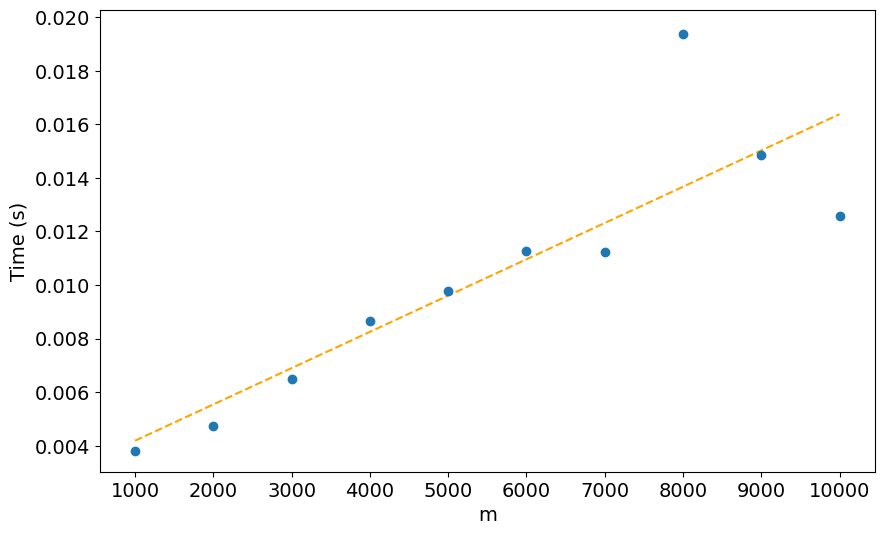

In [3]:
plot_time_mean_variance_incr_n(n=256, trials=3, START=1000, END=10001, STEP=1000)

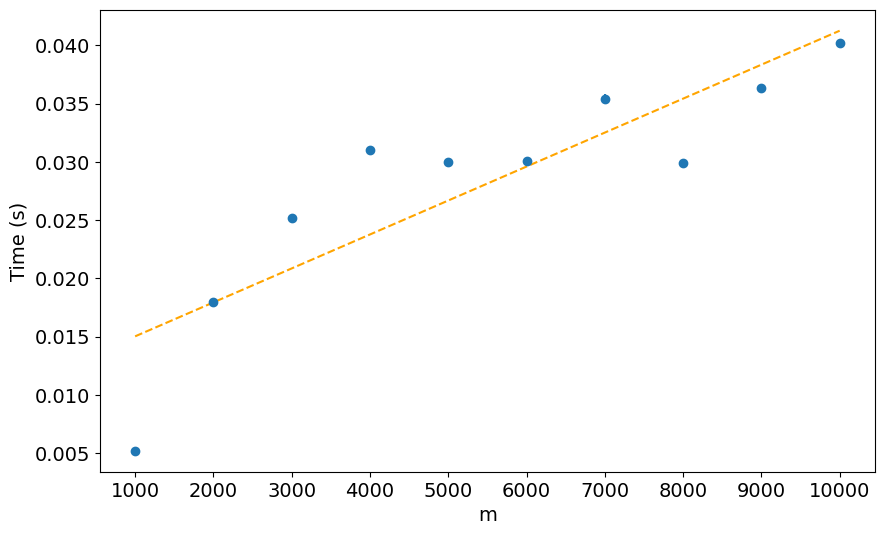

In [4]:
plot_time_mean_variance_incr_n(n=512, trials=3, START=1000, END=10001, STEP=1000)

Show that our implementation scale linearly in "n"

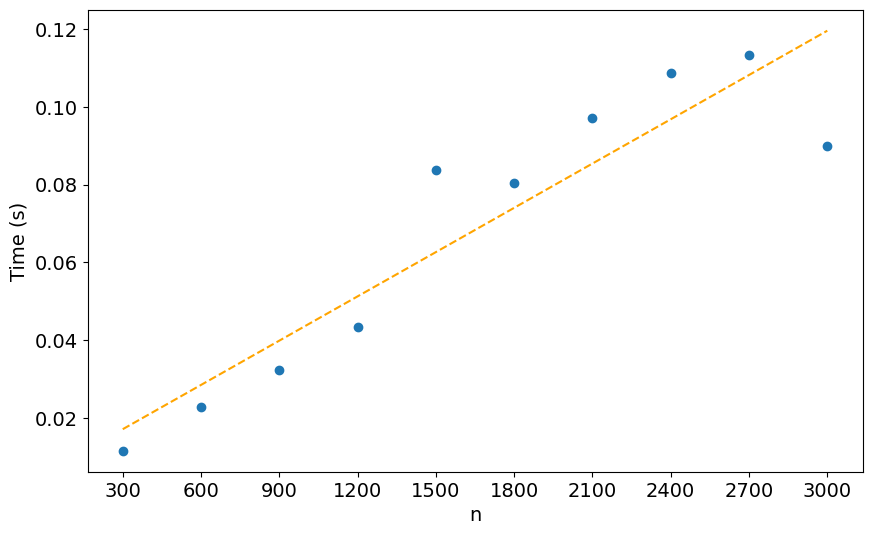

In [5]:
plot_time_mean_variance_incr_m(m=3500, trials=3, START=300, END=3001, STEP=300)

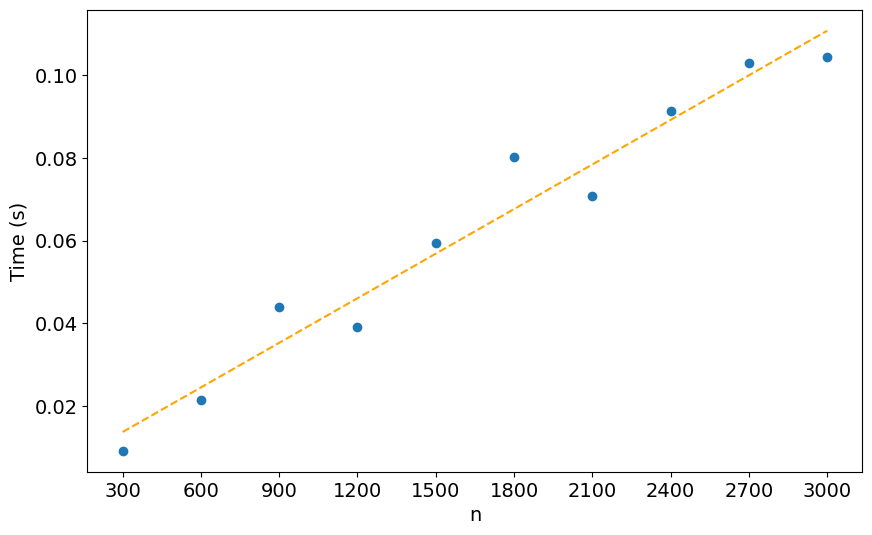

In [6]:
plot_time_mean_variance_incr_m(m=5000, trials=3, START=300, END=3001, STEP=300)

## Accuracy Analysis

Show that our implementatio holds the theoretical accuracy/stability analysis. We use an "a posteriori" test exploiting the residual:

$\frac{||X - QR||}{||X||}$

We well compare it with the standard QR on the new matrix 

### Uniform X

In [3]:
a, b = -1, 1
num_matrices = 100
END = 5000
MAX_N = 512

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.uniform(a, b, size=(m, n)) for m, n in dimensions]
new_columns = [np.random.uniform(a, b, size=(m, 1)) for m, _ in dimensions]

residuals_QR = []
residuals_QR_incr = []

for i, matrix in enumerate(matrices):
    incr_qr_residual, qr_residual = residual_QR_incr(matrix, new_columns[i])
    
    residuals_QR.append(qr_residual)
    residuals_QR_incr.append(incr_qr_residual)

print(f'QR from zero: {np.mean(residuals_QR), np.var(residuals_QR)}')
print(f'Incremental QR: {np.mean(residuals_QR_incr), np.var(residuals_QR_incr)}')


1.4378438650485118e-15 8.546722976158174e-32
1.4343703308236812e-15 8.745146077145847e-32


### Normal X

In [4]:
loc, scale = 0, 1

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.normal(loc, scale, size=(m, n)) for m, n in dimensions]
new_columns = [np.random.normal(loc, scale, size=(m, 1)) for m, _ in dimensions]

residuals_QR = []
residuals_QR_incr = []

for i, matrix in enumerate(matrices):
    incr_qr_residual, qr_residual = residual_QR_incr(matrix, new_columns[i])
    
    residuals_QR.append(qr_residual)
    residuals_QR_incr.append(incr_qr_residual)

print(f'QR from zero: {np.mean(residuals_QR), np.var(residuals_QR)}')
print(f'Incremental QR: {np.mean(residuals_QR_incr), np.var(residuals_QR_incr)}')

QR from zero: (np.float64(1.3958778461908127e-15), np.float64(1.048452425372452e-31))
Incremental QR: (np.float64(1.3909259990205233e-15), np.float64(1.0555257454281335e-31))
